In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
cp = pd.read_csv(r"C:\Users\Abhinandan\Desktop\car_price (1).csv")

In [63]:
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [64]:
cp.shape

(205, 26)

In [65]:
cp.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [66]:
cp = cp.replace({"?":np.nan})

In [69]:
cp.isnull().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [70]:
cp.dtypes

symboling              int64
normalized_losses     object
Fuel_type             object
make                  object
num_of_doors          object
aspiration            object
wheel_base            object
engine_location       object
drive_wheels         float64
body_style            object
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [71]:
cp.normalized_losses   = cp.normalized_losses.astype('float')
cp.bore                =cp.bore.astype('float')
cp.stroke             = cp.stroke.astype('float')
cp.horsepower         = cp.horsepower.astype('float')
cp.peak_rpm           = cp.peak_rpm.astype('float')


In [72]:
cp.normalized_losses = cp.normalized_losses.fillna(cp.normalized_losses.mean())
cp.bore = cp.bore.fillna(cp.bore.mean())
cp.num_of_doors = cp.num_of_doors.fillna("four")
cp.stroke =  cp.stroke.fillna(cp.stroke.mean())
cp.horsepower = cp.horsepower.fillna(cp.horsepower.mean())
cp.peak_rpm = cp.peak_rpm.fillna(cp.peak_rpm.mean())

In [73]:
cp.dtypes

symboling              int64
normalized_losses    float64
Fuel_type             object
make                  object
num_of_doors          object
aspiration            object
wheel_base            object
engine_location       object
drive_wheels         float64
body_style            object
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [74]:
# converting non-numeric to numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [75]:
cp.body_style        = le.fit_transform(cp.body_style)
cp.engine_type       = le.fit_transform(cp.engine_type)

cp.fuel_system       = le.fit_transform(cp.fuel_system)


In [76]:
cp =cp.dropna()

In [77]:
cp.dtypes # all data numeric

symboling              int64
normalized_losses    float64
Fuel_type             object
make                  object
num_of_doors          object
aspiration            object
wheel_base            object
engine_location       object
drive_wheels         float64
body_style             int32
length               float64
width                float64
height               float64
curb_weight            int64
engine_type            int32
num_of_cylinders      object
engine_size            int64
fuel_system            int32
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [78]:
from sklearn.model_selection import train_test_split
cp_train , cp_test= train_test_split(cp, test_size=.2)

In [79]:
cp_train_x = cp_train.iloc[:, :-1]
cp_train_y = cp_train.iloc[:,-1]

In [80]:
cp_test_x = cp_test.iloc[:, :-1]
cp_test_y = cp_test.iloc[:,-1]

In [81]:
print(cp_train_x.shape)
print(cp_train_y.shape)
print("-----------------")
print(cp_test_x.shape)
print(cp_test_y.shape)

(160, 25)
(160,)
-----------------
(41, 25)
(41,)


In [82]:
from sklearn.linear_model import LinearRegression
linreg =LinearRegression()

In [83]:
linreg.fit(cp_train_x ,cp_train_y )

ValueError: could not convert string to float: 'gas'

In [40]:
pred_train = linreg.predict(cp_train_x)
pred_test = linreg.predict(cp_test_x)

In [41]:
Rsquare = linreg.score(cp_train_x , cp_train_y )
Rsquare

0.8799583350496256

In [42]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]

In [1]:
Adjsquare = 1-((1-Rsquare)*(N-1)/(N-K-1))
Adjsquare

NameError: name 'Rsquare' is not defined

In [44]:
linreg.coef_

array([ 1.11847137e+02, -1.22232415e+01,  2.42847534e+03,  8.58689185e+02,
       -1.50956323e+02, -2.81406029e+02,  1.37206158e+03,  1.60937819e+04,
        1.49111210e+02, -2.09791740e+02,  4.54008765e+00,  6.37451658e+02,
        1.36031190e+02,  8.60876342e-01, -5.26945923e+02,  1.84204380e+02,
        9.06828664e+01,  5.71802120e+01,  2.11674049e+02, -2.61707051e+03,
       -1.10690211e+01,  2.11277884e+01,  1.65083068e+00, -2.90438884e+02,
        3.15877838e+02])

In [45]:
linreg.intercept_

-67673.66687821124

In [47]:
error_train = cp_train_y - pred_train
error_test  = cp_test_y  - pred_test

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [65]:
np.mean(error_test)

-117.32935993187449

In [66]:
SSE = np.sum(np.square(error_test))
SSE

527958938.14684635

In [67]:
err_wid_mean = cp_train_y.mean() -pred_train 

In [68]:
SSR = np.sum(np.square(err_wid_mean))
SSR

9404738441.48572

In [69]:
np.mean(error_test)

-117.32935993187449

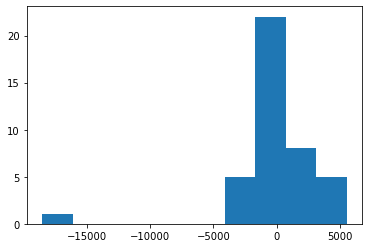

In [70]:
plt.hist(error_test);

C:\Users\Abhinandan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

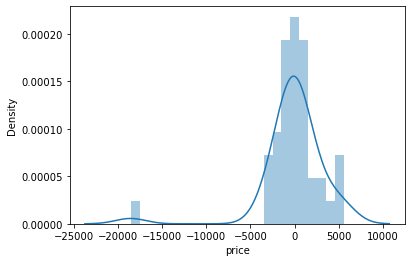

In [71]:
sns.distplot(error_test)

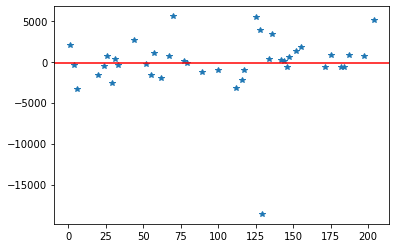

In [72]:
plt.plot(error_test, "*")
plt.axhline(y= np.mean(error_test), color= "r")

In [73]:
actual_data = pd.DataFrame({"actual":cp_train_y , "pred":pred_train   })

In [74]:
actual_data

,actual,pred
19,6295,7999.181188
50,5195,6101.337175
105,19699,20435.152319
68,28248,25412.594383
173,8948,9934.120747
...,...,...
98,8249,6133.242850
201,19045,17486.074648
203,22470,17251.858198
46,11048,12006.648012


<AxesSubplot:xlabel='actual', ylabel='pred'>

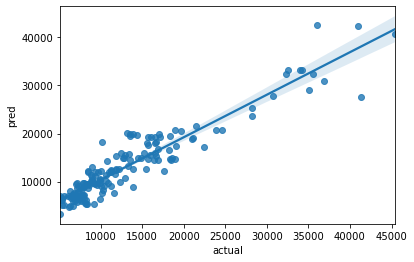

In [75]:
sns.regplot(x="actual" ,y= "pred", data=actual_data)

In [76]:
MAE = np.mean(np.abs(error_test))
MAE

1960.0456038262698

In [77]:
MSE = np.mean(np.square(error_test))
MSE

12877047.271874305

In [78]:
RMSE = np.sqrt(MSE)
RMSE

3588.4602926428356

In [79]:
MAPE = np.mean(np.abs(error_test*100 /cp_test_y))
MAPE

15.509480956806748

In [80]:
Acc = np.round(100-MAPE)
Acc

84.0